<a href="https://colab.research.google.com/github/cynthiatcelorio/ML_Clustering/blob/main/dani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
%pip install clustimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
# librerias
from glob import glob
import matplotlib.pyplot as plt
from skimage import color
from skimage.color import rgb2gray
from skimage.io import imshow, imread
from clustimage import Clustimage
from sklearn.cluster import KMeans
import cv2


In [84]:
!git clone "https://github.com/cynthiatcelorio/ML_Clustering_Data.git"

ruta_train = "/content/ML_Clustering_Data/train"
ruta_test = "/content/ML_Clustering_Data/test"

fatal: destination path 'ML_Clustering_Data' already exists and is not an empty directory.


In [85]:
train_images = glob('/content/ML_Clustering_Data/train/*')
test_images = glob('/content/ML_Clustering_Data/train/*')

In [86]:
len(train_images)

7889

### Preprocesamiento de las imágenes

Antes de extraer características de las imágenes, tenemos que llevar a cabo un preprocesamiento para poder comparar las imágenes en lo referente a color y valor.

La librería Clustimage cuenta con una función *imread* que premite escalar las imagenes a una dimensión concreta y pasarlas a escala de grises asignando al parámetro *colorscale* el valor 0.

In [102]:
# Inicializar
cl = Clustimage()

# Cargar dataset
images_entrenamiento = []
images_gris = []

for i in range(0, len(train_images)):
    img = cl.imread(train_images[i], dim=(128, 128), colorscale=0, flatten=True)
    images_entrenamiento.append(img)


# repetimos para test
for i in range(0, len(train_images)):
    img = cl.imread(test_images[i], dim=(128, 128), colorscale=0, flatten=True)
    images_entrenamiento.append(img)



print(len(images_gris))

"""
img = cl.imread(train_images[1980], dim=(128, 128), colorscale=1, flatten=True)

print(img)


# proximo objetivo: plottear como 9 a la vez, mirar por algun lado
plt.figure()
plt.imshow(img.reshape(128,128,3))
plt.axis('off')"""

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


0


"\nimg = cl.imread(train_images[1980], dim=(128, 128), colorscale=1, flatten=True)\n\nprint(img)\n\n\n# proximo objetivo: plottear como 9 a la vez, mirar por algun lado\nplt.figure()\nplt.imshow(img.reshape(128,128,3))\nplt.axis('off')"

7889


(-0.5, 127.5, 127.5, -0.5)

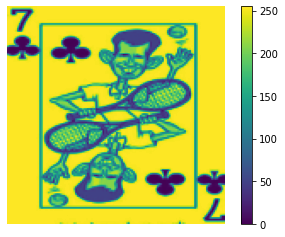

In [104]:
#IDEA: PASAR TODO A BLANCO Y NEGRO Y PASAR A BLANCO (255) LO QUE ESTE POR ENCIMA DE YOQUESE 102
#ejemplo breve:
print(len(images_entrenamiento))

# prueba para cualquier imagen pero funciona
img = images_entrenamiento[1993]

plt.figure()
plt.imshow(img.reshape(128, 128))
plt.colorbar()
plt.axis('off')

In [ ]:
#######################
# PRUEBA GUARRA   #
#######################

# imgb = color.rgb2gray(img)

"""
mask = img < 87
img[mask] = 255


plt.figure()
plt.imshow(imgb)
plt.axis('off')
"""

### Entrenamiento del modelo

Generamos una nueva estructura con las imágenes ya preprocesadas, convertidas en arrays unidimensionales mediante el método *ravel()*.

In [105]:
train = []

for i in range(0, len(images_entrenamiento)):
    img = images_entrenamiento[i].ravel()
    train.append(img)


print(len(train))

7889


In [106]:
print(train[1234])

# ya tienen valores numericos unidimensionales

[ 73 183 228 ... 246 238 180]


In [107]:
km = KMeans().fit(train)